# Hand Written Digit Classification Using Neural Network

### In this we are going to use built in tensorflow dataset for building our neural network to classify a hand written digit into numbers from 0-9

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Loading Dataset from tensorflow


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# Data Exploration

In [3]:
X_train[0].shape # checking shape of data to set neurons shape respectively

(28, 28)

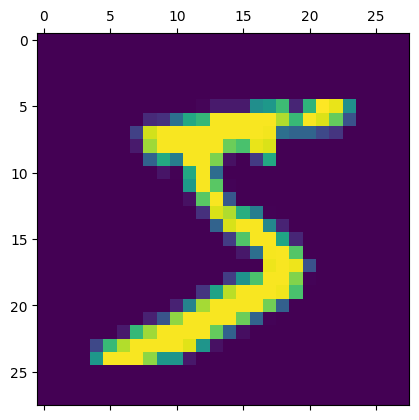

In [4]:
plt.matshow(X_train[0]) #plotting number with help of matplotlib

In [5]:
y_train[0] # checking if plot and number are same

5

In [6]:
X_train[0] #checking number matrix status

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#scaling data for better results
X_train = X_train / 255
X_test = X_test / 255

# Making a Neural Netowork using tensorflow keras

In [8]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)



Epoch 1/10


1875/1875 [==============================] - 10s 4ms/step - loss: 0.2720 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1239 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0861 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0242 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 

In [9]:
#evaluating model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9766


[0.08357585966587067, 0.9765999913215637]

# Confusion Matix

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

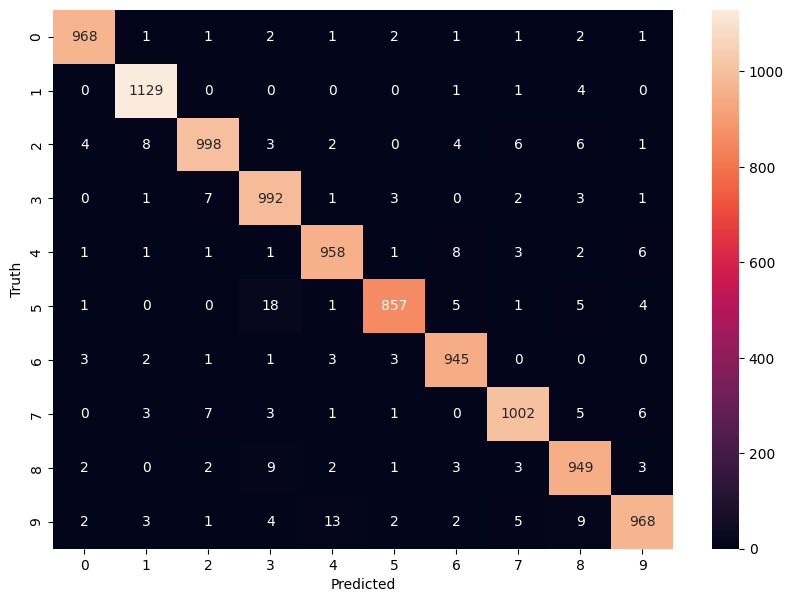

In [10]:
#seaborn to see confusion matrix
import seaborn as sn 

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# F-1 Score and Accuracy

In [11]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_predicted_labels)

# Print classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Manualy Checking Values

In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [13]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)